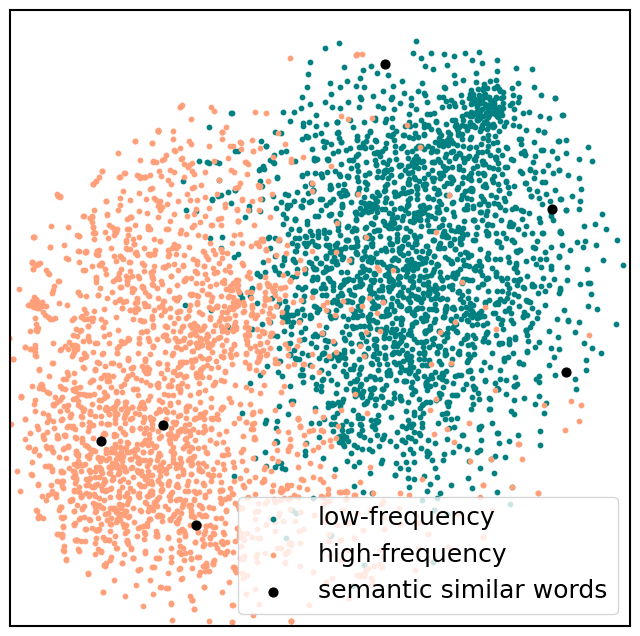

In [3]:
'''
present the distributions of the last hidden states of high frequency and low frequency words
before VarGAN
'''


import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import torch
from spiral import safe_simple_split
from sklearn.manifold import TSNE
import pickle



with open("vector_12.pkl","rb") as f: #file contains the hidden_states of each words
      vector2=[]
      while True:
                try:
                    vector=pickle.load(f)
                    vector2.append(vector)
                except EOFError:
                    break
f.close()
with open("name_frequency_12.pkl","rb") as f: #file contains the words and their frequencies
      name_frequency=[]
      while True:
                try:
                    list=pickle.load(f)
                    name_frequency.append(list)
                except EOFError:
                    break
f.close()

tensor = torch.Tensor([item.cpu().detach().numpy() for item in vector2[:]])
tsne = TSNE(n_components=2, random_state=42,perplexity=27) #create and fit the TSNE model
X_tsne=tsne.fit_transform(tensor)




freq_word_ls = []
sel_word_ls = []
similarities= []

for i in range(len(tensor[:])):
    if name_frequency[i][0]=='angular' or name_frequency[i][0]=='angle' or   name_frequency[i][0]=='names' or name_frequency[i][0]=='element_name'  or name_frequency[i][0]=='_clock' or name_frequency[i][0]=='timer' :  
        similarities.append(X_tsne[i])#list some examples
    if name_frequency[i][1]<300:
        sel_word_ls.append(X_tsne[i])
    else:
        freq_word_ls.append(X_tsne[i])

similarities=np.array(similarities)
freq_word_ls = np.array(freq_word_ls)
sel_word_ls = np.array(sel_word_ls)

# result
plt.figure(figsize=(8, 8))
plt.xticks([])
plt.xlim(-40,40)
plt.yticks([])
plt.ylim(-40,40)

plt.rcParams['font.size']=20
bwith=1.5
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.scatter(sel_word_ls[-2500:, 0], sel_word_ls[-2500:, 1], s=10, c='teal', label='low-frequency')
plt.scatter(freq_word_ls[:2500, 0], freq_word_ls[:2500, 1], s=10, c='#FFA07A',label='high-frequency')
plt.scatter(similarities[:, 0], similarities[:, 1], s=40, c='black',label='semantic similar words')
plt.legend(fontsize="18",loc=4)
plt.savefig('semantic similarity words.pdf')
plt.show()


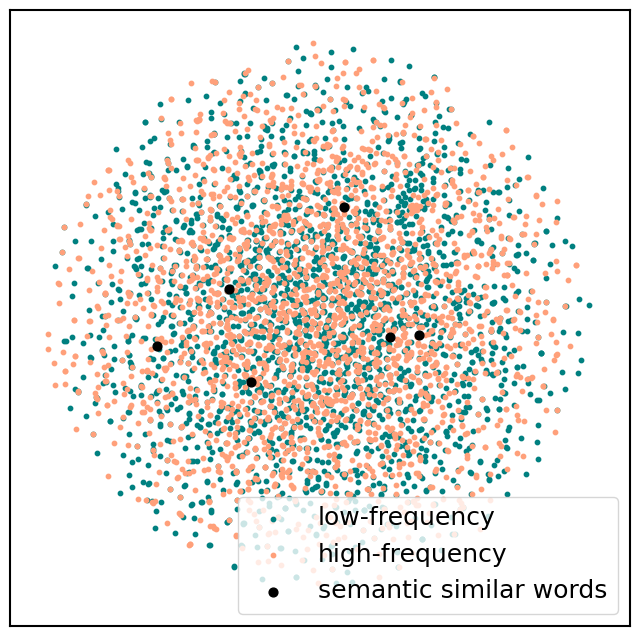

In [2]:
'''
present the distributions of the last hidden states of high frequency and low frequency words
after VarGAN
'''

import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import torch
from spiral import safe_simple_split
from sklearn.manifold import TSNE
import pickle



with open("vector_gan_12.pkl","rb") as f: #file contains the hidden_states of each words
      vector2=[]
      while True:
                try:
                    vector=pickle.load(f)
                    vector2.append(vector)
                except EOFError:
                    break
f.close()
with open("name_frequency_gan_12.pkl","rb") as f: #file contains the words and their frequencies
      name_frequency=[]
      while True:
                try:
                    list=pickle.load(f)
                    name_frequency.append(list)
                except EOFError:
                    break
f.close()

tensor = torch.Tensor([item.cpu().detach().numpy() for item in vector2[:]])
tsne = TSNE(n_components=2, random_state=42,perplexity=27) #create and fit the TSNE model
X_tsne=tsne.fit_transform(tensor)




freq_word_ls = []
sel_word_ls = []
similarities= []

for i in range(len(tensor[:])):
    if name_frequency[i][0]=='angular' or name_frequency[i][0]=='angle' or   name_frequency[i][0]=='names' or name_frequency[i][0]=='element_name'  or name_frequency[i][0]=='_clock' or name_frequency[i][0]=='timer' :  
        similarities.append(X_tsne[i]) # list some examples
    if name_frequency[i][1]<300:
        sel_word_ls.append(X_tsne[i])
    else:
        freq_word_ls.append(X_tsne[i])

similarities=np.array(similarities)
freq_word_ls = np.array(freq_word_ls)
sel_word_ls = np.array(sel_word_ls)

# result
plt.figure(figsize=(8, 8))
plt.xticks([])
plt.xlim(-40,40)
plt.yticks([])
plt.ylim(-40,40)

plt.rcParams['font.size']=20
bwith=1.5
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.scatter(sel_word_ls[-2500:, 0], sel_word_ls[-2500:, 1], s=10, c='teal', label='low-frequency')
plt.scatter(freq_word_ls[:2500, 0], freq_word_ls[:2500, 1], s=10, c='#FFA07A',label='high-frequency')
plt.scatter(similarities[:, 0], similarities[:, 1], s=40, c='black',label='semantic similar words')
plt.legend(fontsize="18",loc=4)
plt.savefig('semantic similarity words_gan.pdf')
plt.show()
